In [2]:
#exercise 3  Part 1
import pandas as pd
import matplotlib.pyplot as plt
import calmap 
import seaborn as sns
import numpy as np

#Loading dataset
crime_data = pd.read_csv("../Data/crime_data_updated.csv")


# Part 1) Temporal Patterns

In [3]:
# Convert the 'Date' column to datetime format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')

# Create a new column 'Year' by extracting the year from the Date column
crime_data['Year'] = crime_data['Date'].dt.year

# Count crimes per year using groupby and size
crimes_per_year = crime_data.groupby('Year').size()
print(crimes_per_year)

Year
2003    142803
2004    142054
2005    137048
2006    131856
2007    131771
2008    135242
2009    134309
2010    127758
2011    126713
2012    135464
2013    147664
2014    144844
2015    151459
2016    145994
2017    149487
2018    143663
2019    138380
2020    112167
2021    121722
2022    127404
2023    125024
2024    102225
2025      7208
dtype: int64


Year with most recorded crimes: 2015 with 151459 crimes
Year with fewest recorded crimes: 2025 with 7208 crimes


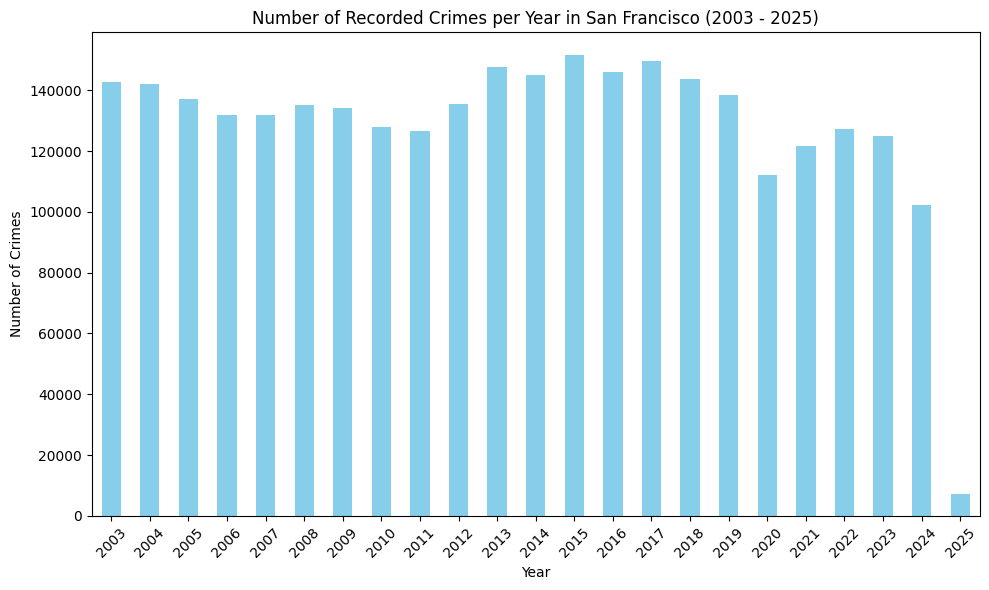

In [4]:

# Get the year with the most crimes
year_most_crimes = crimes_per_year.idxmax()
max_crimes = crimes_per_year.max()

# Get the year with the fewest crimes
year_fewest_crimes = crimes_per_year.idxmin()
min_crimes = crimes_per_year.min()

print("Year with most recorded crimes:", year_most_crimes, "with", max_crimes, "crimes")
print("Year with fewest recorded crimes:", year_fewest_crimes, "with", min_crimes, "crimes")

# Sort the crimes per year from lowest to highest
crimes_per_year_sorted = crimes_per_year.sort_index()

# Plot bar plot of crimes per year
plt.figure(figsize=(10, 6))
crimes_per_year_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Recorded Crimes per Year in San Francisco (2003 - 2025)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

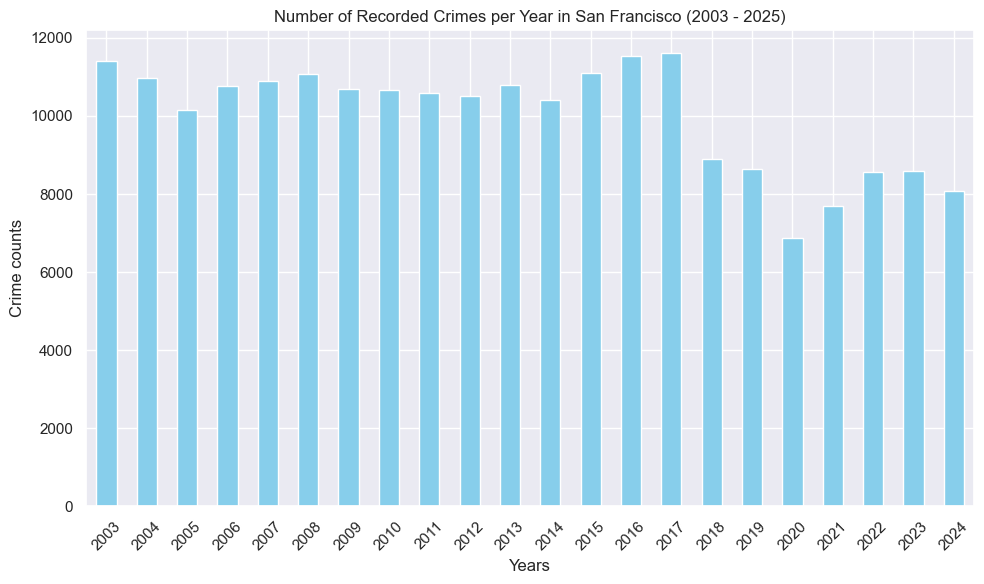

In [20]:
# Sort the crimes per year from lowest to highest
crimes_per_year_sorted = crimes_per_year.sort_index()

# Plot bar plot of crimes per year
plt.figure(figsize=(10, 6))
crimes_per_year_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Crime counts')
plt.title('Number of Recorded Crimes per Year in San Francisco (2003 - 2025)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

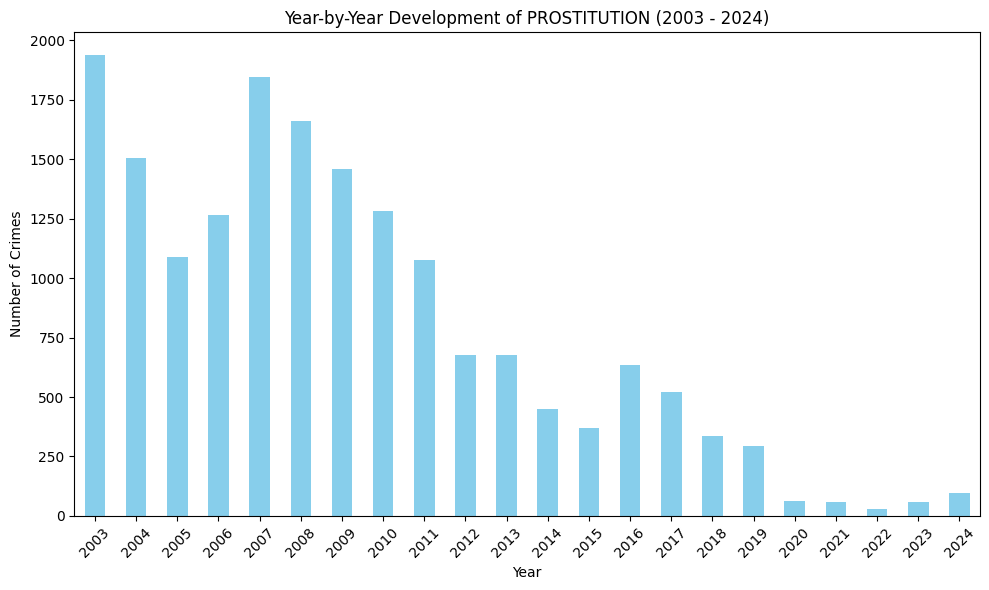

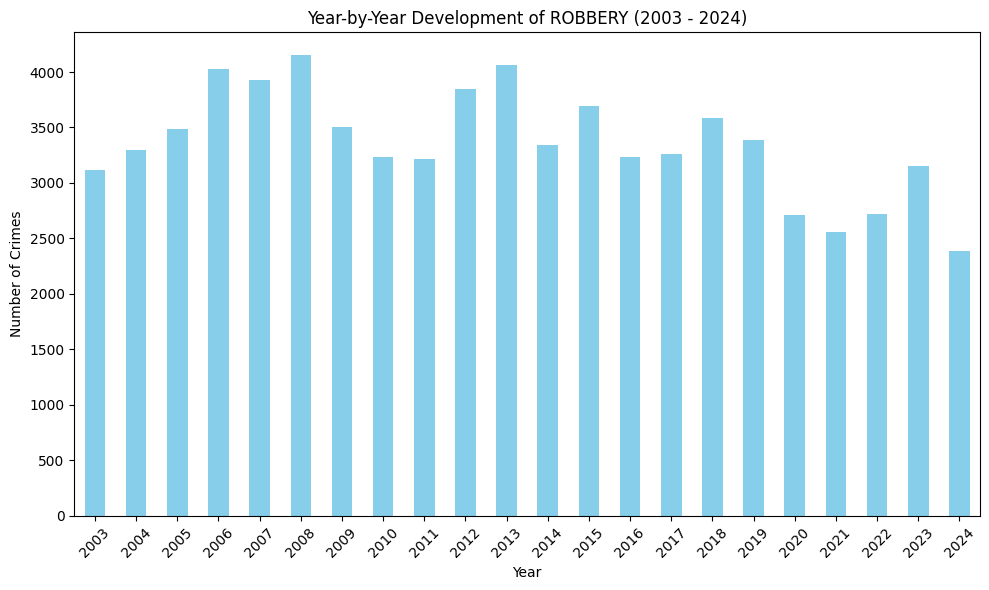

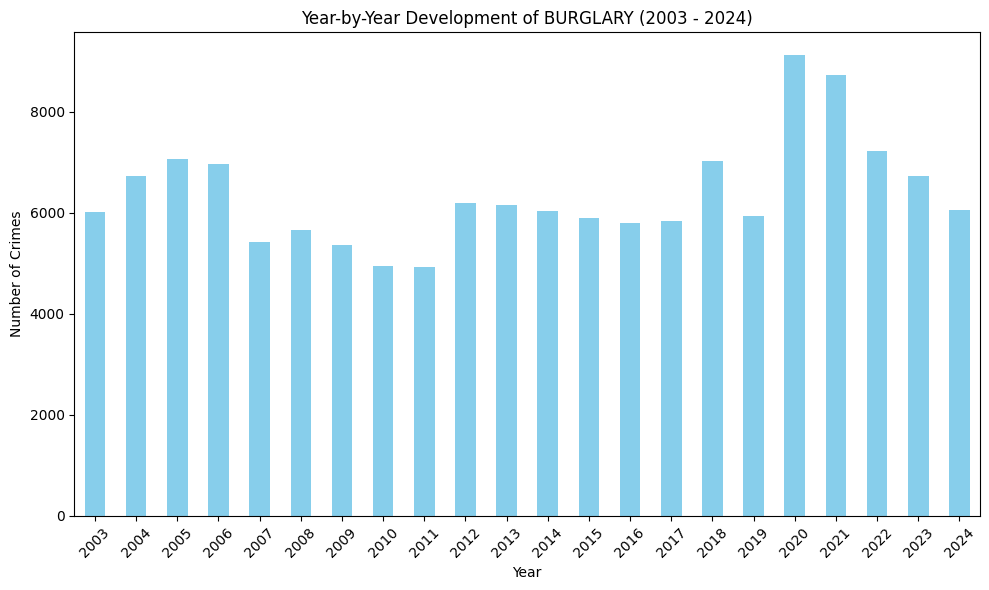

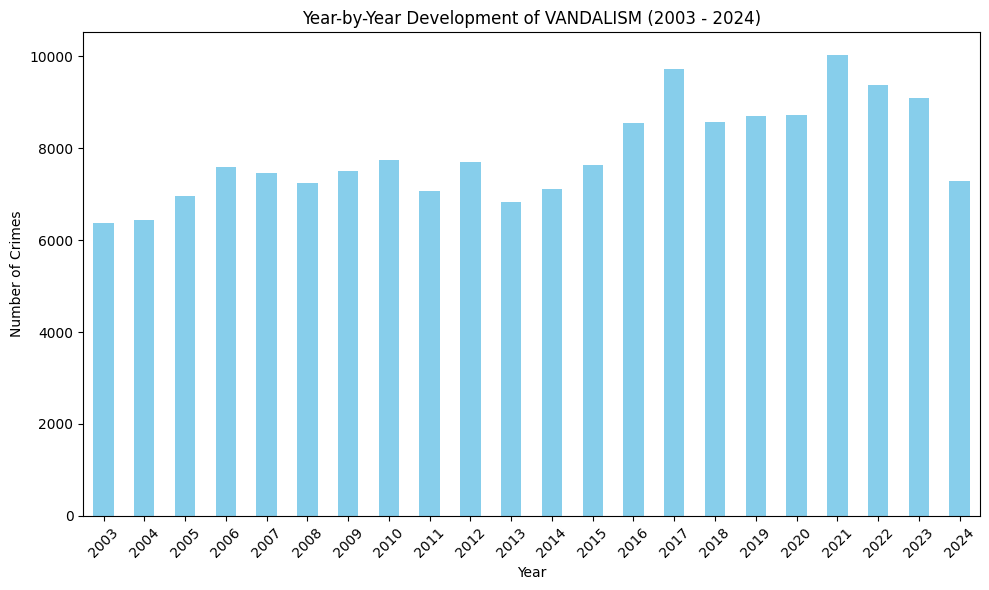

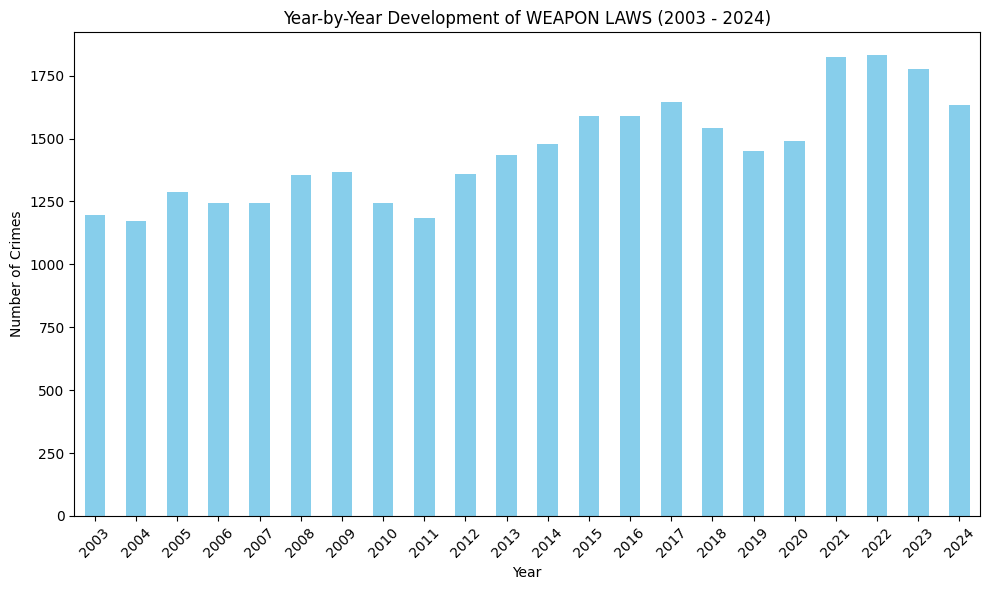

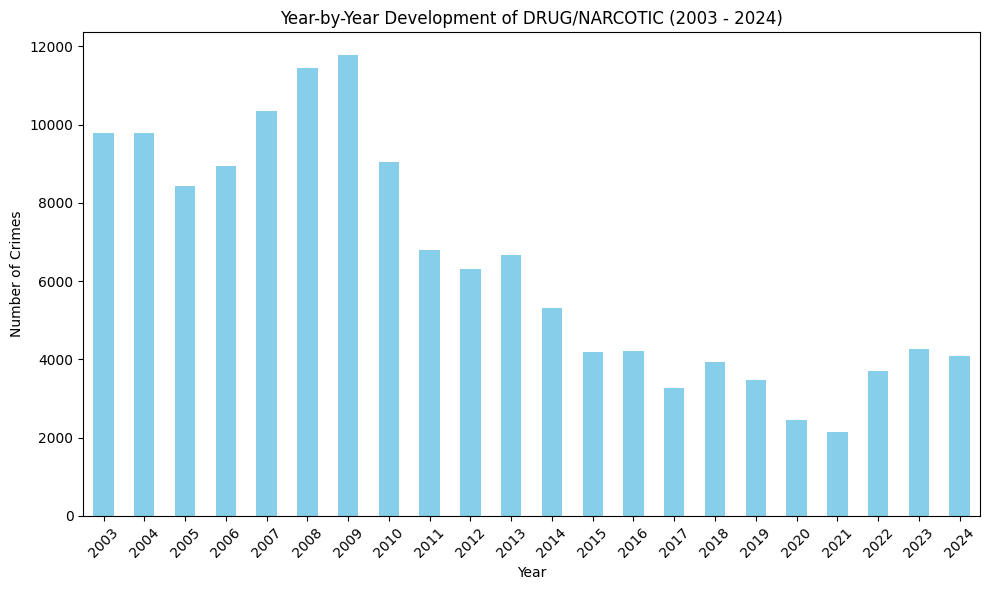

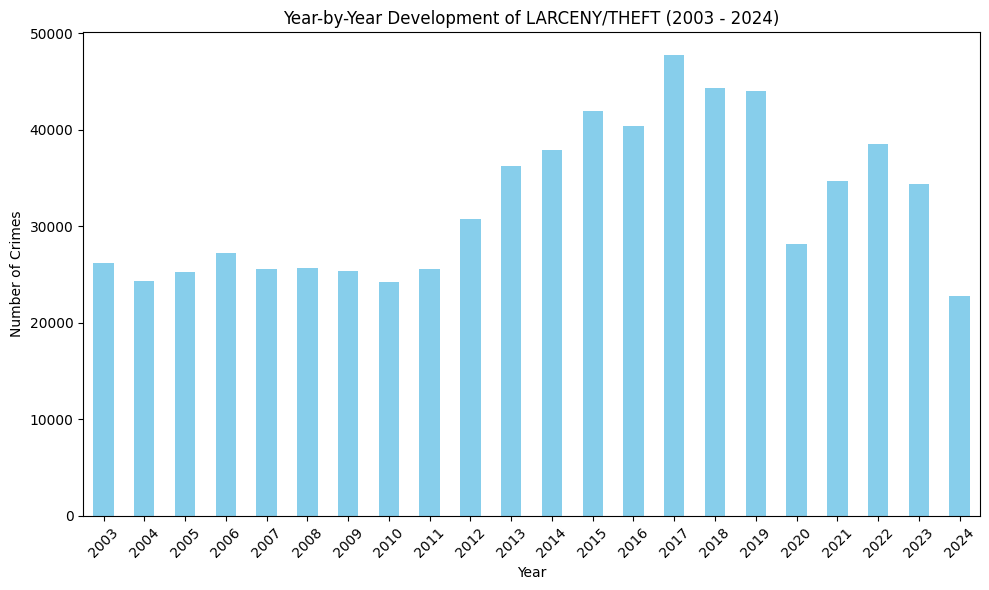

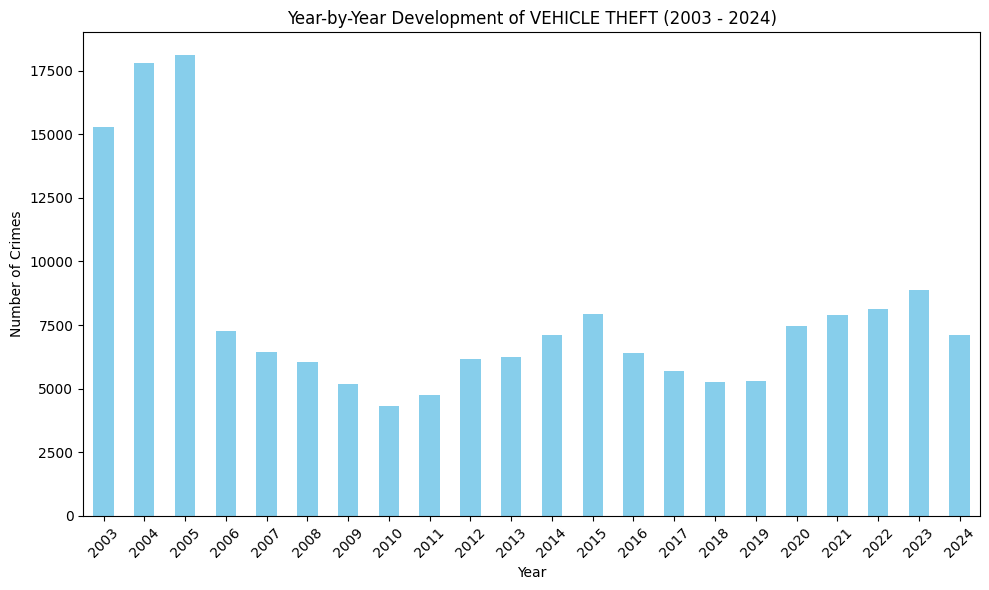

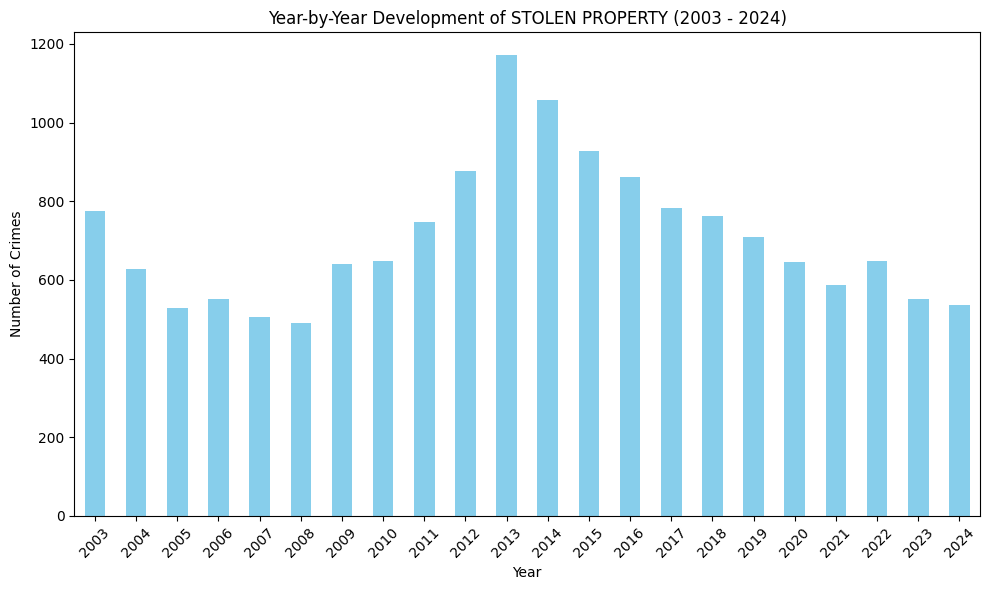

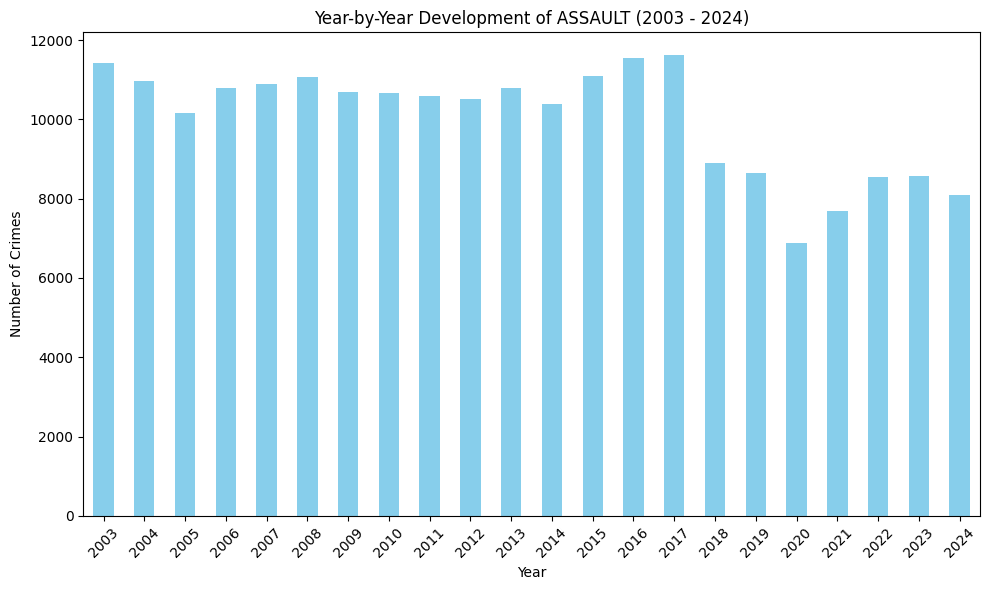

In [6]:
# Now to plot the focus crimes bar plots

# Define the focus crime categories
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# Since 2025 isn't over yet, we exclude it from the data
crime_data = crime_data[(crime_data['Year'] >= 2003) & (crime_data['Year'] <= 2024)]

# Loop over each focus crime category
for crime in focuscrimes:
    # Filter for the current crime category
    crime_subset = crime_data[crime_data['Category'] == crime]
    
    # Count the number of crimes per year
    crimes_per_year = crime_subset['Year'].value_counts().sort_index()
    
    # To ensure that every year is represented even though the count is 0, we add missing years with 0 crimes just in case
    all_years = pd.Series(0, index=range(2003, 2025))
    crimes_per_year = all_years.add(crimes_per_year, fill_value=0).astype(int)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    crimes_per_year.plot(kind='bar', color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.title(f'Year-by-Year Development of {crime} (2003 - 2024)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Part 1) Continued: 

## Comment on at least three interesting trends in your plot.

1. One interesting trend is that prostitution has declined heavily since 2007, which coincided with the subprime mortgage crisis of 2007. One explanation could be that due to the economic circumstances, sex services became less affordable and thus it declined. In the 2010s it continued to decline, despite the latter half of the 2010s marking an economic recovery [1].

2. Also noticed, when cleaning the dataset, the new dataset had vandalism, but the numbers were significantly smaller than the old dataset from 2003 to 2018. When I combined malicious mischief, which hints at vandalism, the numbers matched the previous dataset more, so a reclassification of vandalism was interesting.

3. Another issue of narcotics has also gone significantly down in the 2010s, which is partly attributed to Proposition 47, which was designed to ease up on the prison population and thus reclassified various crimes from felonies to misdemeanors, including possession of most illegal narcotics for consumption [2].

### References:
[1] Doe, J. (2010). *Economic Effects of the 2007 Financial Crisis*. Journal of Economics.  
[2] California Legislative Information. *Proposition 47 Overview*. Available at: [https://www.courts.ca.gov/prop47.htm](https://www.courts.ca.gov/prop47.htm)


# Part 2 

**What is the difference between data and metadata? How does that relate to the GPS tracks example?**

The difference between data and metadata can be explained by how we understand the information. Specifically, it depends on whether the data is analyzed objectively or subjectively. Data is objective, like the longitude and latitude from Garmin-Connect GPS tracks. This type of information points to the same destination no matter who is interpreting it—whether you are male, female, young, old, or from any background. This kind of data is commonly used in fields like finance, accounting, statistics, and mathematics.

Metadata, on the other hand, is more subjective, as it relies on context to make sense of the data. This means metadata can be interpreted differently depending on the person or the situation. Even though it is more interpretive, metadata plays a critical role in adding meaning and richness to the data. For example, in the GPS tracks, metadata would include the context surrounding the data, like the types of roads, the size of buildings, or the distance between cars. In simple terms, metadata gives context to the raw data to make it more useful and meaningful.

**Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at and something it struggles with.**

Whether the human eye is good for data analysis is a complicated question with both yes and no answers. As Sune points out, the human eye is excellent at recognizing patterns and extracting useful insights from data. This ability allows us to identify outcome patterns—the relationship between a certain action or observation and its predictable result. This is similar to the idea of causation in statistics.
For instance, imagine you notice that the streetlights outside your window always turn on at 6 PM. Over time, you might observe that the exact timing varies slightly with the seasons. In winter, they turn on earlier than in summer. By simple observation, your brain has started to identify a pattern and understand the relationship between time and the streetlights turning on.
However, there are times when the human eye falls short in analyzing data. This happens when the data doesn’t fit the expected pattern, or when visual information is ambiguous. For example, the famous Rabbit-Duck illusion shows how the human eye can perceive something in more than one way. Some people see a rabbit, while others see a duck. This illustrates how our brains can interpret the same visual data differently based on subjective perception, which makes certain kinds of analysis difficult for the eye.

**Simpson’s Paradox is hard to explain. Provide an example.**

To explain Simpson’s Paradox, let’s use the example of poverty in Nigeria and India and their progress on the United Nations’ Sustainable Development Goal 1: Reducing Poverty. While studies suggest that poverty is increasing in these countries, Simpson’s Paradox may help offer a different perspective. At first, the increase in poverty may seem like a negative trend, but it could actually be due to better data tracking methods. 
In both Nigeria and India, the efforts to monitor and track poverty have improved significantly over the years. More thorough data collection means that previously hidden or underreported cases of poverty are now being recognized. As a result, it may seem like more people are living in poverty, but this could simply reflect more accurate monitoring, and not an actual increase in poverty levels. Simpson’s Paradox illustrates how better data tracking can lead to conclusions that initially appear negative but are actually the result of improved methods of measurement.

**In your own words, explain the difference between exploratory and explanatory data analysis.**

The difference between exploratory and explanatory data analysis can be summarized in terms of how the data is used.
Exploratory data analysis is about using observations to uncover patterns within the data. This method focuses on understanding the structure of the data and finding relationships or trends, often without having a clear hypothesis in mind. It is about getting a feel for the data and generating questions that can later be tested. For example, in the case of the streetlights turning on at certain times, this is a form of exploratory analysis, where we notice a pattern and create a hypothesis about how it works.
On the other hand, explanatory data analysis focuses on explaining or communicating specific insights. This type of analysis is more structured and guided by a particular purpose—often to support a claim or argument. It involves highlighting key elements of the data to explain or emphasize certain findings. While exploratory analysis is about discovering, explanatory analysis is about presenting and interpreting the data in a way that supports a specific narrative or conclusion.


**Generating a list of 10 rules for creating effective data visualizations.**

Below you can find our list of 10 key rules for creating high-quality data visualization:

**Rule #1: Use subplots**

Instead of stacking a lot of individual plots on top of eachother, you can use subplots to keep things organized and make comparisons easier.

**Rule #2: Fix spacing**

Matplotlib's tight_layout works well to tighten things up so your plots look clean and easy to read.

**Rule #3: Labelling of axes**

A plot without axis labels is almost impossible to understand. Clearly indicating axes labels are thus crucial to understand the context.

**Rule #4: Include legends**

If your plot has multiple lines or categories, adding a legend to explain what they represent makes the reader understand the analysis much faster

**Rule #5: Use tick labels**

Make sure the numbers on your axes actually make sense. For example, use weeks instead of random numbers.

**Rule #6: Avoid Y-Axis zoom misleading**

Be mindful of how your axis scaling affects interpretation. A zoomed-in y-axis can, for example, exaggerate small differences and make trends look more significant than they are.

**Rule #7: Consistency in axes scales**

If you’re comparing multiple plots, use the same scale on the axes cause otherwise things might look more significant (or insignificant) than they really are.

**Rule #8: Maximize the data-to-ink ratio**

Follow Edward Tufte’s principle: remove unnecessary decorations, excessive colors, gridlines and other overuse of formatting. Instead, you should try to simply focus on showing the data in a clear and understandable manner. 

**Rule #9: Use appropriate font**

The default Matplotlib font isn’t the most "professional". Switching the font can make your analysis and plot look much more polished and professional.

**Rule #10: Write short and clear captions**

A good figure caption should avoid vague arguments but summarize the key takeaway in only a few sentences.

# Part 3) Other Cool Ways to Plot Temporal Data 

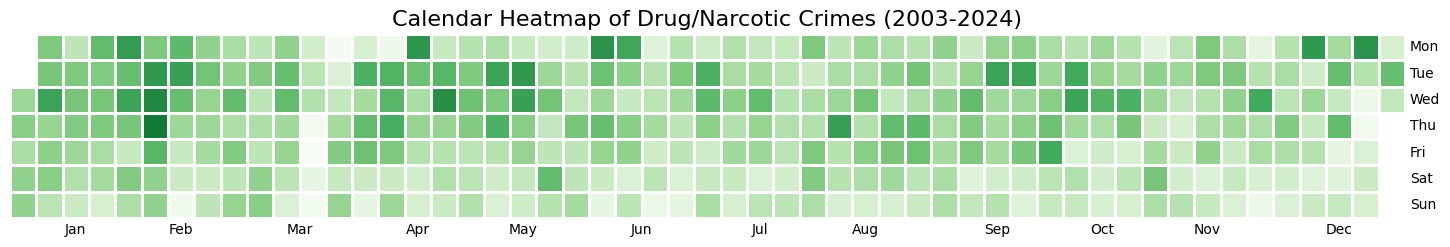

In [ ]:
# Let's create a calendar heatmap of the number of crimes based on drugs and narcotics

# Filter for years 2003-2024 (again because 2025 has little data) and "DRUG/NARCOTIC" category
filtered_data = crime_data[
    (crime_data['Date'].dt.year >= 2003) & 
    (crime_data['Date'].dt.year <= 2024) & 
    (crime_data['Category'] == "DRUG/NARCOTIC")
]

# Aggregate crimes per day
crime_counts_per_day = filtered_data.groupby(filtered_data['Date'].dt.date).size()

# Convert index to datetime for calmap compatibility
crime_counts_per_day.index = pd.to_datetime(crime_counts_per_day.index)

# Plot calendar heatmap
plt.figure(figsize=(18, 10))
calmap.yearplot(crime_counts_per_day, cmap='Greens', fillcolor='white')

# Add title
plt.title("Calendar Heatmap of Drug/Narcotic Crimes (2003-2024)", fontsize=16)

plt.show()

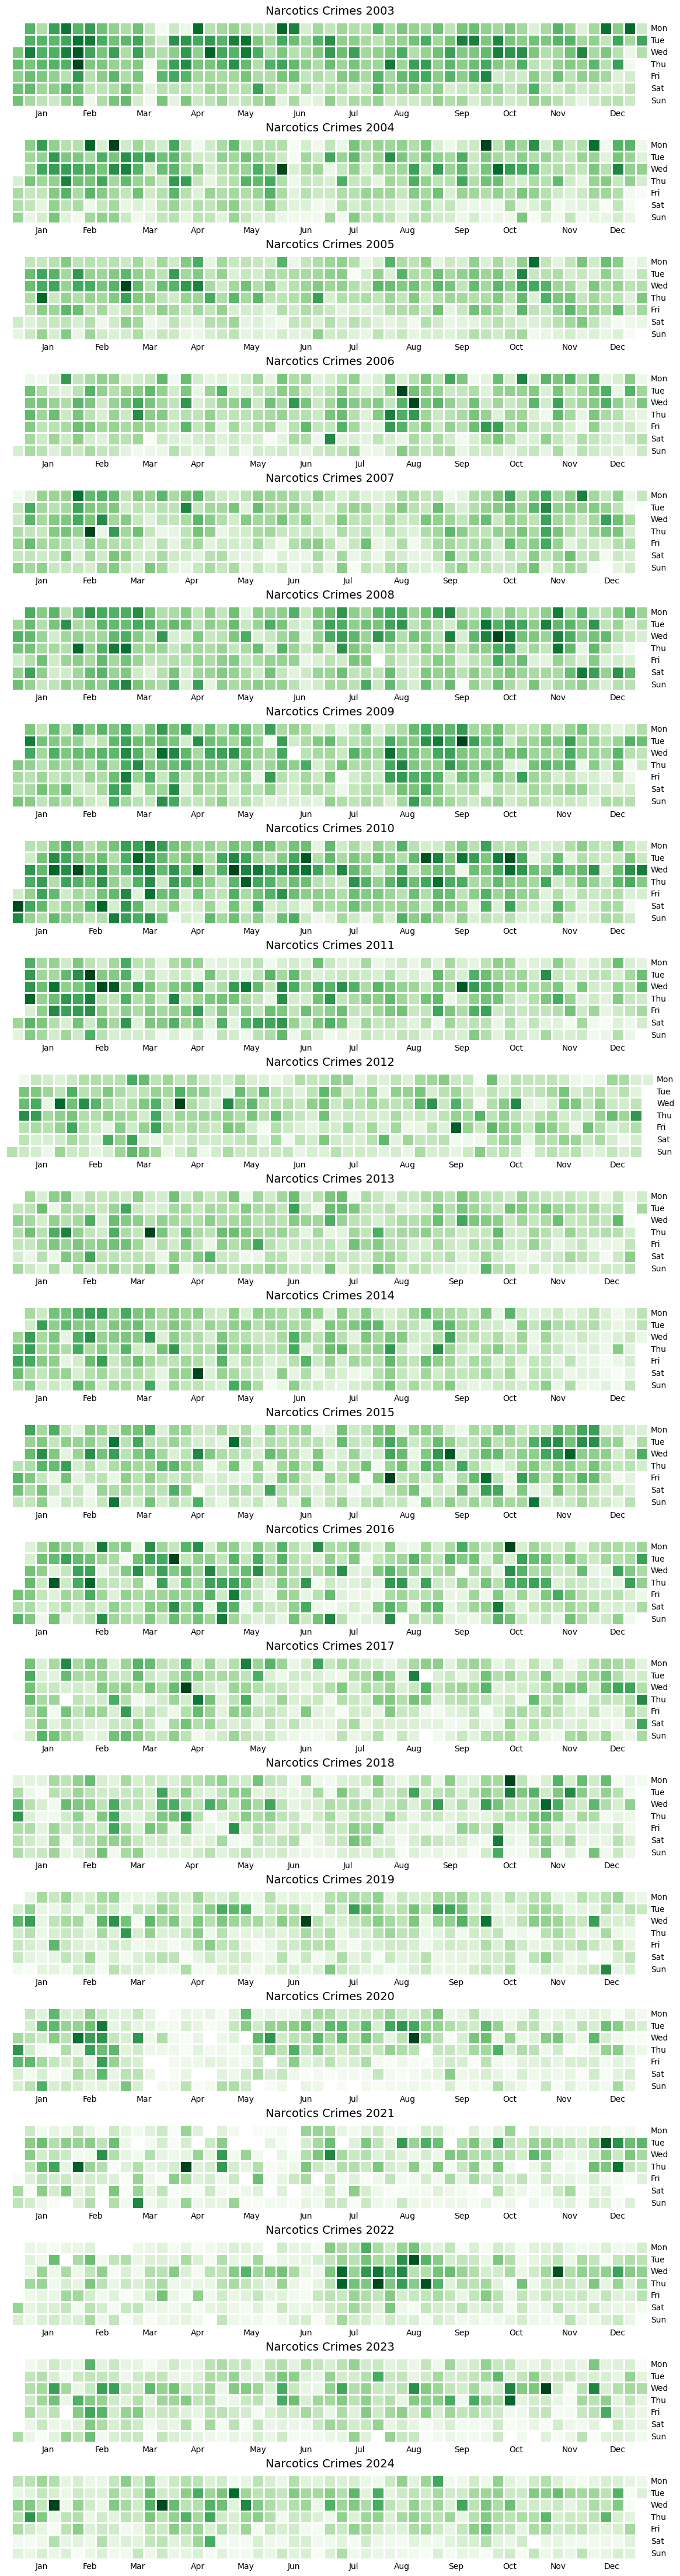

In [ ]:
# Set up subplots: 1 column, multiple rows (one per year)
num_years = len(range(2003, 2025))
fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(18, num_years * 2), constrained_layout=True)

# Loop through each year and plot a separate calendar heatmap in each row
for i, year in enumerate(range(2003, 2025)):
    ax = axes[i]  # Select current subplot

    # Filter crimes for the current year
    yearly_data = crime_counts_per_day[crime_counts_per_day.index.year == year]

    # Create a yearly calendar heatmap
    calmap.yearplot(yearly_data, year=year, cmap='Greens', fillcolor='white', ax=ax)

    # Add title for each year
    ax.set_title('Narcotics Crimes ' + str(year), fontsize=14, pad=10)

# Show the plot
plt.show()

With calendar plots, it is difficult to visualize the absolute size of crime occurences, but if we are interested in seeing the concentration of crimes in a given date, calender plots are nice to visualize with. In this specific scenario, we can see that the early 2000s have relatively dark boxes, which gradually tapered down into the later 2000s, which then shot up again in 2008, possibly as a side effect of the financial crisis as mentioned in part 1. One interesting note is that the number of narcotics crimes seem to be tapering off the last 5 years, despite the opoid crisis wreaking havoc onto America's narcotics issue. 

In [9]:
# Polar Bar chart

# Let's go back to prostitution and plot a polar bar chart of prostitution cases based on hour of the day
prostitution_data = crime_data[crime_data['Category'] == 'PROSTITUTION']

# Convert the 'Time' column to datetime format
prostitution_data['Time'] = pd.to_datetime(prostitution_data['Time'])

# Extract the hour from the Time column
prostitution_hourly = prostitution_data['Time'].dt.hour

# Count the number of prostitution cases per hour
prostitution_hourly_counts = prostitution_hourly.value_counts().sort_index()

# Let's see the counts
print(prostitution_hourly_counts)

Time
0     1466
1     1114
2      833
3      583
4      485
5      579
6      531
7      277
8      155
9      159
10     194
11     219
12     527
13     345
14     324
15     268
16     316
17     630
18    1184
19    1375
20    1099
21    1330
22    1678
23    1710
Name: count, dtype: int64


C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\797439788.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prostitution_data['Time'] = pd.to_datetime(prostitution_data['Time'])
C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\797439788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prostitution_data['Time'] = pd.to_datetime(prostitution_data['Time'])


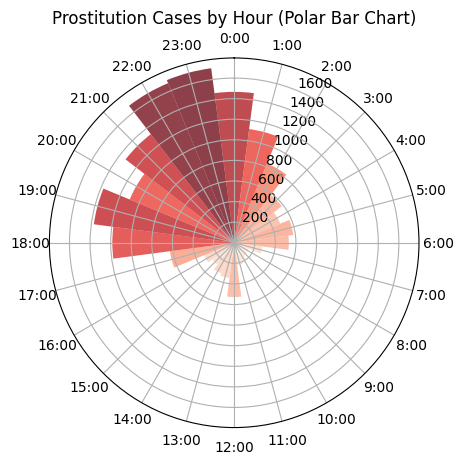

In [10]:
# Number of slices
num_slices = 24

# Convert hours (0-23) into angles for the polar plot from 0 to 2pi
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
radii = prostitution_hourly_counts.values
# Define bar width
width = 2 * np.pi / 24  # Uniform width for each hour

ax = plt.subplot(projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0, color=plt.cm.Reds(radii / radii.max()), alpha=0.75)

# Set 0° at the top so that it starts at midnight at the top
ax.set_theta_zero_location("N")
# Clockwise direction
ax.set_theta_direction(-1)

# Set labels for hours
ax.set_xticks(theta)
ax.set_xticklabels([f"{h}:00" for h in range(24)])

plt.title("Prostitution Cases by Hour (Polar Bar Chart)")
plt.show()

This polar chart shows the various magnitudes of prostitution cases by the hour and the higher the count, the higher the slice in the polar chart chart. We can see here that during the day, from 06:00 to 16:00, we see a relatively insignificant amount of prostitution cases, but they suddenly concentrate between 17:00 - 02:00 tapering off towards 05:00. This makes sense on the consumer side given that purchasers of sex usually have jobs to afford them. One interesting phenomena to explore would be observing if prostitutes have day jobs, and if so, what occupation they have, number of hours worked per week and how often they work as prostitutes.

Reflection:

What I learned is that going nuts with relatively simple scripts are achieveable with LLMs given context, but if I need to tweak some variables, it is unclear what I need to change due to the fact that this code was generated for me. 

# Part 4

The following jitter plot depicts the arrest times for prositution between 2AM and 3AM in the Winter month of January and February. Of no surprise there is little difference between the frequency of cases throughout these dark night-hours compared to more brighter parts of the day where offenders may be doing normal everyday activities. 

C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\267179765.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data_filtered["Hour"] = pd.to_datetime(crime_data_filtered["Time"], errors="coerce").dt.hour
C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\267179765.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_filtered["Hour"] = pd.to_datetime(crime_data_filtered["Time"], errors="coerce").dt.hour
C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\267179765.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

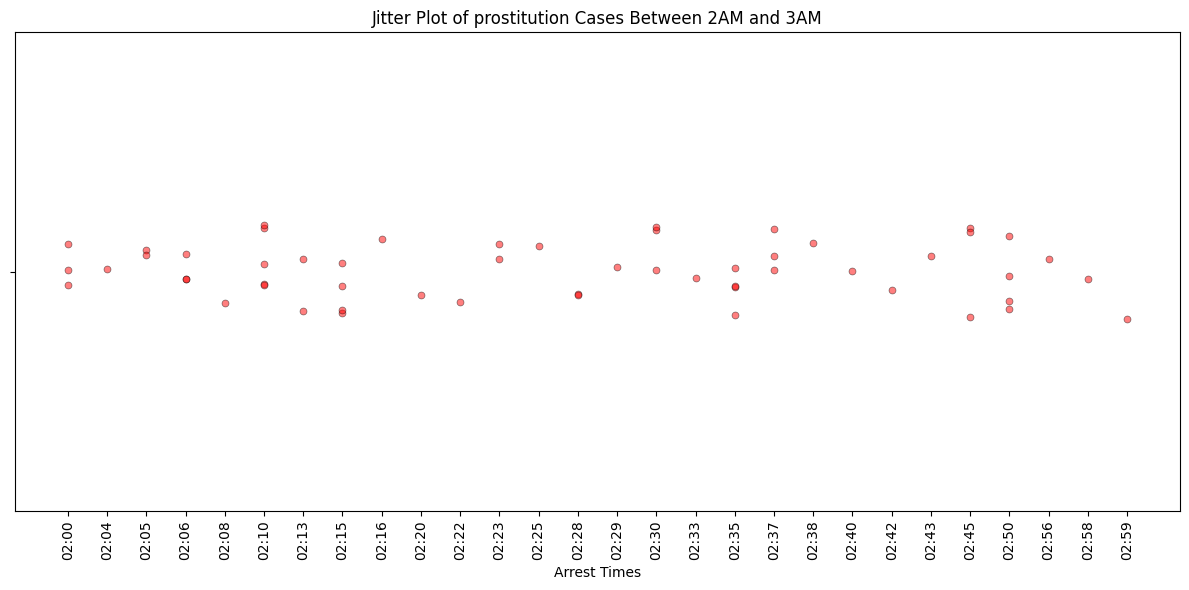

In [11]:
#Exercise 1.1:

#Creating jitter plot

# Convert the 'Date' column to datetime format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')

#creating column for months
crime_data["Month"] = pd.to_datetime(crime_data["Date"], errors="coerce").dt.month

# Create a new column 'Year' by extracting the year from the Date column
crime_data['Year'] = crime_data['Date'].dt.year

#filtering out Jan & Feb
crime_data_filtered = crime_data[(crime_data["Month"] > 1) & (crime_data["Month"] <= 2)]

#creating column for hours
crime_data_filtered["Hour"] = pd.to_datetime(crime_data_filtered["Time"], errors="coerce").dt.hour

# Converting all district names to uppercase letters to avoid duplication
crime_data_filtered["PdDistrict"] = crime_data_filtered["PdDistrict"].str.upper()

#choosing "prostitution" as crime type
prostitution_data = crime_data_filtered[crime_data_filtered["Category"] == "PROSTITUTION"]

# Convert 'Time' column to datetime format
prostitution_data['Time'] = pd.to_datetime(prostitution_data['Time'], errors='coerce')

#choosing hour interval
hour_start = 2
hour_end = 3

# Filtering the data for the specific hour range (2AM - 3AM)
prostitution_arrest_times = prostitution_data[(prostitution_data['Time'].dt.hour >= hour_start) & (prostitution_data['Time'].dt.hour < hour_end)]

# Extracting the time for the jitter plot
prostitution_arrest_times['Time'] = prostitution_arrest_times['Time'].dt.strftime("%H:%M")

# Sorting by "Time" in ascending order
prostitution_arrest_times = prostitution_arrest_times.sort_values(by="Time")

# Creating jitter plot
plt.figure(figsize=(12, 6))
sns.stripplot(
    x='Time', 
    data=prostitution_arrest_times, 
    marker="o", 
    edgecolor="black", 
    linewidth=0.5, 
    alpha=0.5,  
    color="red",  
    jitter=True  
)
#formatting
plt.xticks(rotation=90)
plt.xlabel("Arrest Times")
plt.title("Jitter Plot of prostitution Cases Between 2AM and 3AM")
plt.tight_layout()
plt.show()


The first selected crime is: LARCENY/THEFT
The first selected crime is: PROSTITUTION
PdDistrict
BAYVIEW       3345
CENTRAL       8674
INGLESIDE     3314
MISSION       5639
NORTHERN      9248
OUT OF SF       80
PARK          2543
RICHMOND      3737
SOUTHERN      9830
TARAVAL       3945
TENDERLOIN    2740
Name: LARCENY/THEFT, dtype: int64
PdDistrict
BAYVIEW        12
CENTRAL       169
INGLESIDE       8
MISSION       752
NORTHERN      314
OUT OF SF       0
PARK            3
RICHMOND       10
SOUTHERN       65
TARAVAL        74
TENDERLOIN    161
Name: PROSTITUTION, dtype: int64


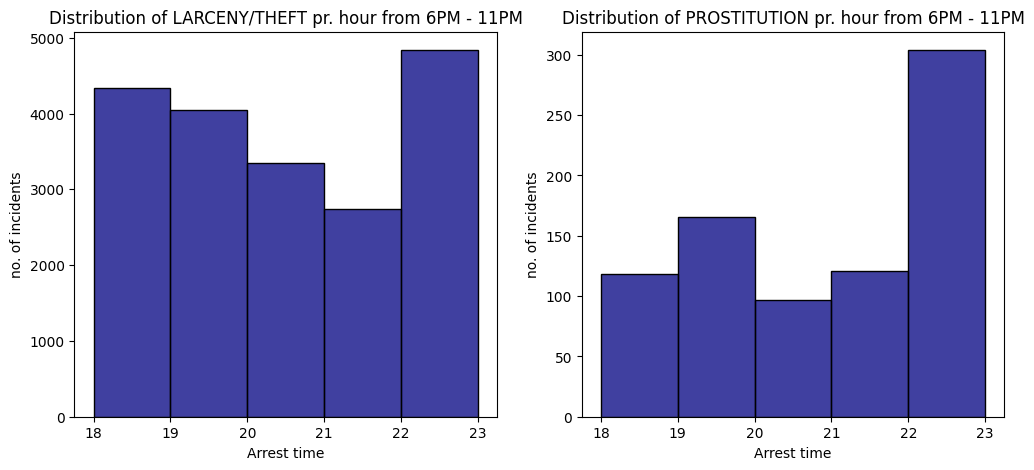

In [ ]:
#Analyzing crime distribution across districts
crime_distribution = crime_data_filtered.groupby(["Category", "PdDistrict"]).size().unstack(fill_value=0)

#exercise 1.2: creating histograms for 2 selected crime categories

#Selecting two crime types - (1) Most frequent crime category and (2) "Prostitution"
# 
crime1 = crime_distribution.idxmax(axis=0).value_counts().idxmax() 
crime2 = "PROSTITUTION"
print(f"The first selected crime is: {crime1}")
print(f"The first selected crime is: {crime2}")

#counting the number of cases pr. district for each selected crime (larceny & prostitution)
crime1_counts = crime_distribution.loc[crime1]
crime2_counts = crime_distribution.loc[crime2]
print(crime1_counts)
print(crime2_counts)

# Selecting 6 PM - 11 PM
time_interval = (crime_data_filtered["Hour"] >= 18) & (crime_data_filtered["Hour"] <= 23)

#Filtering data and ploting histograms
two_crime_types = crime_data_filtered[time_interval & crime_data_filtered['Category'].isin([crime1, crime2])]
plt.figure(figsize=(12, 5))

for i, crime in enumerate([crime1, crime2], 1):
    plt.subplot(1, 2, i)
    sns.histplot(two_crime_types[two_crime_types["Category"] == crime]["Hour"], bins=5, color="navy")
    plt.title(f"Distribution of {crime} pr. hour from 6PM - 11PM")
    plt.xlabel("Arrest time")
    plt.ylabel("no. of incidents")


Category    LARCENY/THEFT  PROSTITUTION
PdDistrict                             
BAYVIEW              1237             6
CENTRAL              2900            78
INGLESIDE            1164             5
MISSION              2249           400
NORTHERN             3671           162
OUT OF SF              21             0
PARK                  891             2
RICHMOND             1159             2
SOUTHERN             3806            26
TARAVAL              1318            16
TENDERLOIN            880           109


C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\671650578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_filtered['Y'] = pd.to_numeric(crime_data_filtered['Y'], errors='coerce')


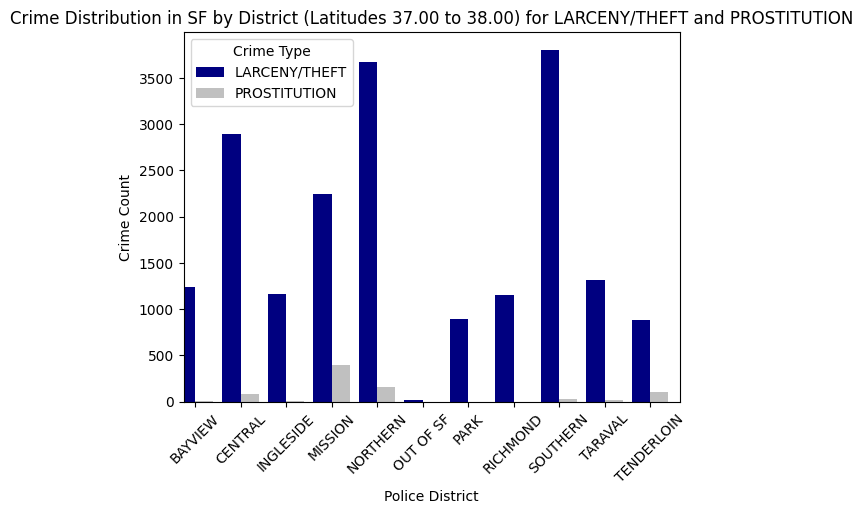

In [ ]:
#Finding the GPS latitudes for each crime 

# Extracting latitude values
latitudes = two_crime_types['Y'].values

# converting  latitude column to float
crime_data_filtered['Y'] = pd.to_numeric(crime_data_filtered['Y'], errors='coerce')

# Extracting latitude values
latitudes = crime_data_filtered[(crime_data_filtered['Category'].isin([crime1, crime2])) &  (crime_data_filtered['Y'] >= 37.00) & (crime_data_filtered['Y'] <= 38.00)]

# Group by Post district and crime type and counting occurrences
crime_counts_by_district = two_crime_types.groupby(['PdDistrict', 'Category']).size().unstack(fill_value=0)
print(crime_counts_by_district)

#creating histogram of latitudes pr. crime and checking for missing values
counts, bin_edges = np.histogram(latitudes['Y'].dropna(), bins=50) 


#plotting histogram
# Plotting the crime distribution for crime1 and crime2
crime_counts_by_district[crime1].plot(kind='bar', width=0.4, position=1, color='navy', label=crime1)
crime_counts_by_district[crime2].plot(kind='bar', width=0.4, position=0, color='silver', label=crime2)
plt.xlabel("Police District")
plt.ylabel("Crime Count")
plt.title(f"Crime Distribution in SF by District (Latitudes 37.00 to 38.00) for {crime1} and {crime2}")
plt.xticks(rotation=45)
plt.legend(title="Crime Type")

Now visualizing the distribution of the two crime types among all post districts across the latitudes 37.00-38.00, the data paints a very similar picture as before. Larceny incidents are most frequent in the Central, Northern and Southern district, whereas the more dominant areas of prostitution cases seem to also include more outer districts likely due to less police enforcement in these areas.

<Axes: title={'center': 'KDE plot of prostitution crimes by hour'}, xlabel='Hour of the Day', ylabel='Density'>

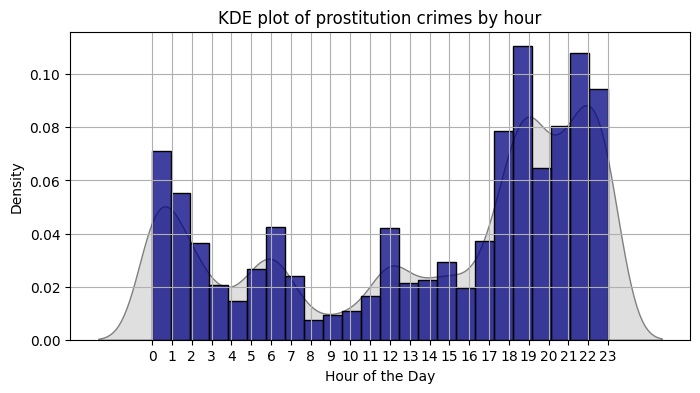

In [14]:
#Exercise Part 1 - 1.3: Histogram + KDE Plot

# Filtering dataset for a Fraud crimes
prostitution_data = crime_data_filtered[crime_data_filtered["Category"] == "PROSTITUTION"]


# Creating KDE and histogram plot for time of fraud crimes using seaborn
plt.figure(figsize=(8, 4))
sns.kdeplot(prostitution_data["Hour"], fill=True, color="grey", bw_adjust=0.5)

#formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Density")
plt.title("KDE plot of prostitution crimes by hour")
plt.xticks(range(0, 24)) 
plt.grid(True)

#adding a histogram to the plot using seaborn
sns.histplot(prostitution_data["Hour"], kde=False, color="navy", bins=24, stat="density")



<Axes: title={'center': 'Plot of 25 random timepoints of prostitution crimes'}, xlabel='Hour of the Day', ylabel='Density'>

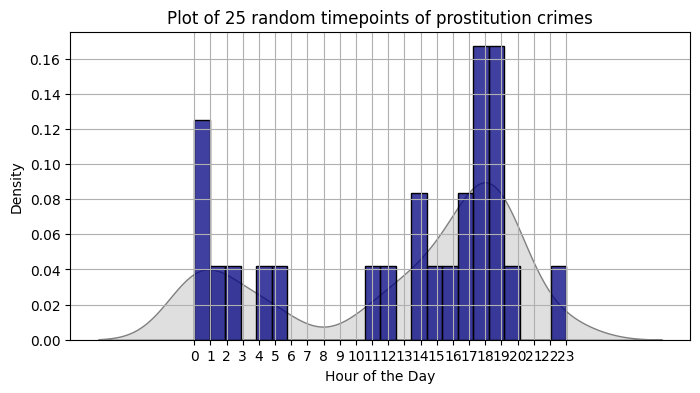

In [15]:
#Creating a dataframe for 25 random timestamps 
random_timepoints = prostitution_data.sample(n=25, random_state=42) 

# Creating KDE plot for the random timepoints 
plt.figure(figsize=(8, 4))
sns.kdeplot(random_timepoints["Hour"], fill=True, color="grey", bw_adjust=0.5)

plt.xlabel("Hour of the Day")
plt.ylabel("Density")
plt.title("Plot of 25 random timepoints of prostitution crimes")
plt.xticks(range(0, 24)) 
plt.grid(True)

#adding a histogram to the plot
sns.histplot(random_timepoints["Hour"], kde=False, color="navy", bins=24, stat="density")


KDEs can be misleading when applied to such a small sample as this. With only 25 data points, the KDE does not show the true distribution or variability, which can result in an inaccurate illustration of crime trends. In contrast, the histogram still accurately reflect the  raw counts and, thus, you need to analyze this in order to generate reliable conclusions. Thus, to include KDE in your analysis you would need a much larger sample such as in the figure of the prostitution crimes pr. hour. 

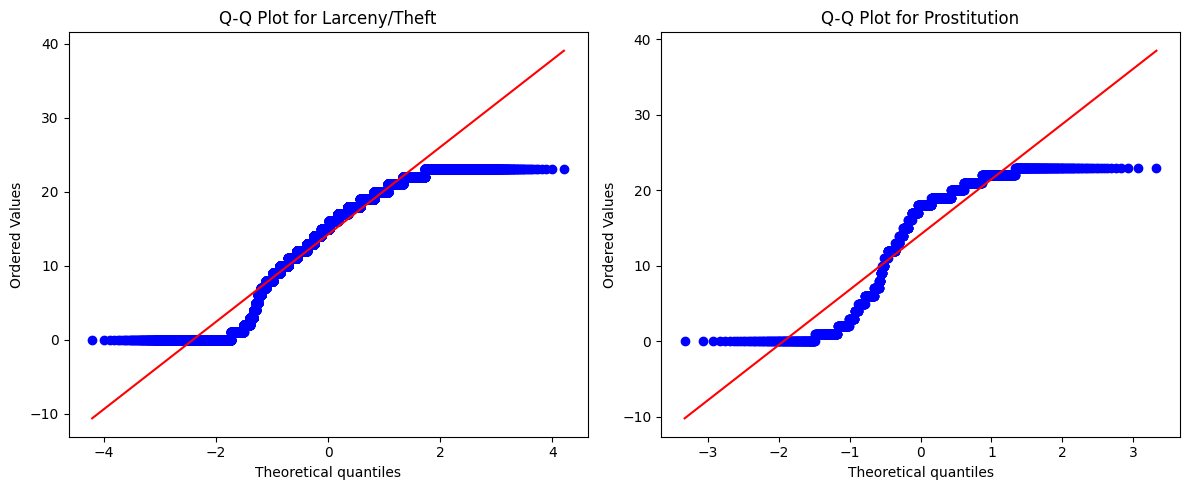

In [16]:
#Exercise part 2, 1.1: creating two versions (Larceny / Theft & prostitution) of the probability plot in Figure 2-11

#importing scipy.stats to use scipy.stats.probplot
import scipy.stats as stats

# Select your two crimes
crime1_data = crime_data_filtered[crime_data_filtered["Category"] == "LARCENY/THEFT"]["Hour"]
crime2_data = crime_data_filtered[crime_data_filtered["Category"] == "PROSTITUTION"]["Hour"]

# Creating Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(crime1_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot for Larceny/Theft")

stats.probplot(crime2_data, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot for Prostitution")

plt.tight_layout()
plt.show()


The Q-Q plots above indicates the degree to which our prostitution and larcency data follows a normal distribution. The diagonal line in red shows a fully normalized distribution from which we can compare our ordered values. As can be seen Larceny/Theft appears to be closer to a normal distribution than Prostitution as the former aligns more closely with the diagonal line in the middle range, suggesting a somewhat more balanced distribution. In contrast, the Prostitution data has more points in the "tails" of the curve deviating further from normality. Since a true Gaussian distribution is smooth and continuous, the step-like patterns in both plots indicate that crime reports are more clustered at specific times. Despite this, Larceny/Theft comes closer to fitting a normal distribution than Prostitution.

Text(0, 0.5, 'Number of Crimes per Day')

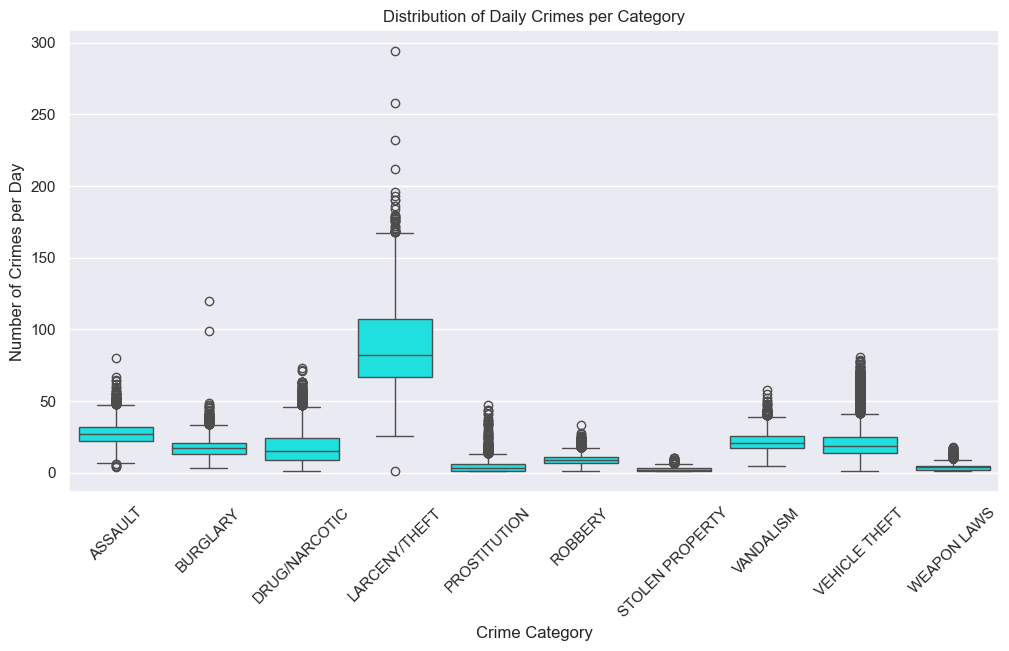

In [21]:
#Filtering out focuscrimes from the original dataset
crime_data_focus = crime_data[crime_data["Category"].isin(focuscrimes)]

#Calculating no. of crimes pr. day pr. category
crime_counts_per_day = (
    crime_data_focus.groupby(["Date", "Category"])
    .size()
    .reset_index(name="Crime_Count")
)

#creating a box plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=crime_counts_per_day, 
    x="Category", 
    y="Crime_Count",
    color="Cyan"
)
plt.xticks(rotation=45)
plt.title("Distribution of Daily Crimes per Category")
plt.xlabel("Crime Category")
plt.ylabel("Number of Crimes per Day")




Looking at the box plot, there are some clear takeaways about how different crimes vary day to day. Larceny/Theft stands out with the highest median and variance, showing that it happens a lot but also fluctuates quite a bit. It also has the most outliers, meaning there are days when reports spike well above the interquantile range. Vehicle Theft and Drug/Narcotic crimes also have a fair number of outliers, though not as extreme. These jumps could be tied to specific events or changes in enforcement. Overall, some crimes—like Larceny/Theft—happen consistently at high rates, while others are steadier but occasionally see big jumps. Compared to the probability plots, it is especially interesting to look at the larceny distribution as this box plot shos that this crime type has the highest median and widest interquartile range, ultimately meaning that it consistently occurs at a much higher rate than other crimes.

C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\3744413153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_focus["Time"] = pd.to_datetime(crime_data_focus["Time"], format="%H:%M", errors="coerce")
C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\3744413153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_focus["TimeDecimal"] = crime_data_focus["Time"].dt.hour + (crime_data_focus["Time"].dt.minute / 60)


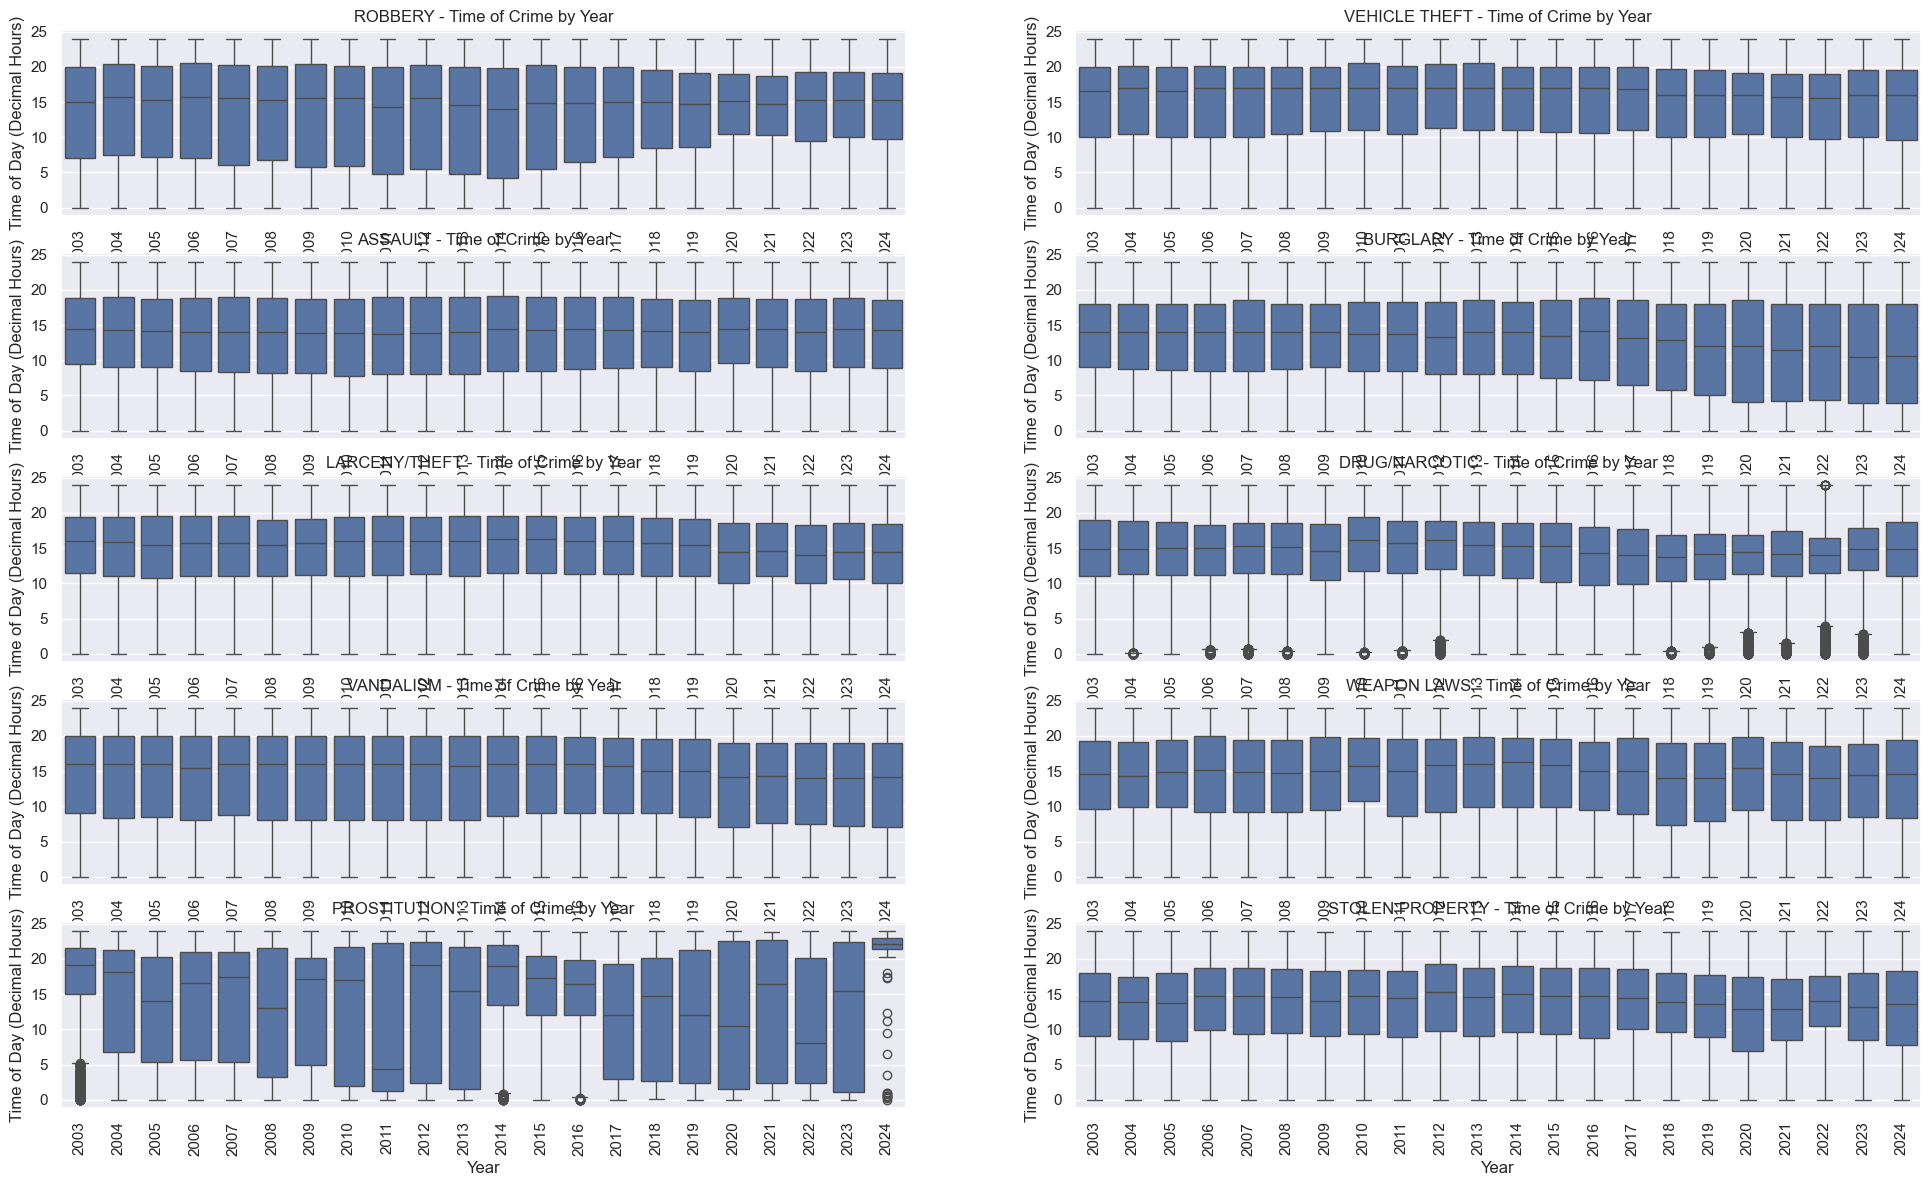

In [22]:
#Making sure that 'Time' is in the right datetime format (HH:MM)
crime_data_focus["Time"] = pd.to_datetime(crime_data_focus["Time"], format="%H:%M", errors="coerce")

#Converting the time-of-day to decimal format
crime_data_focus["TimeDecimal"] = crime_data_focus["Time"].dt.hour + (crime_data_focus["Time"].dt.minute / 60)


#Calculating the average time-of-day (ToD) for each focus-crime.
average_ToD_pr_crime = crime_data_focus.groupby("Category")["TimeDecimal"].mean().reset_index()


#Creating box plots for ToD pr. crime pr. year
plt.figure(figsize=(24, 14))

# Looping through each focus crime
for i, crime in enumerate(crime_data_focus["Category"].unique()):
    plt.subplot(5, 2, i+1)
    
    # Filtering data for the specific crime
    crime_data_crime = crime_data_focus[crime_data_focus["Category"] == crime]

    # Creating boxplot for the given crime type
    sns.boxplot(data=crime_data_crime, x="Year", y="TimeDecimal", order=sorted(crime_data_crime["Year"].unique()))
    
    plt.title(f"{crime} - Time of Crime by Year")
    plt.xlabel("Year")
    plt.ylabel("Time of Day (Decimal Hours)")
    plt.xticks(rotation=90)

plt.show()

Above you can see box plots showing the distribution of the average time-of-day (ToD) that the 10 focus crimes. I have sorted these by year in order to see if the ToD of the crimes change through the years. As can be seen, there is not much variance in ToD across the different focus crimes, though it is a bit interesting to see the fluctuations in ToD for prostitution cases. The reasons for this can be hard to tell. It may be due to lack of data but could also be explained by factual reasons such as dark/day hours, law enforcements, increased use of online platforms, or something else. 

# Part 5
## Week 4, Part 3
Exercise: "Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3.

In this section, an analysis of the temporal trends of prostitution in San Francisco is presented. The first step involved examining the data on prostitution incidents over time (Figure 1), which helped identify key years that warrant further focus.

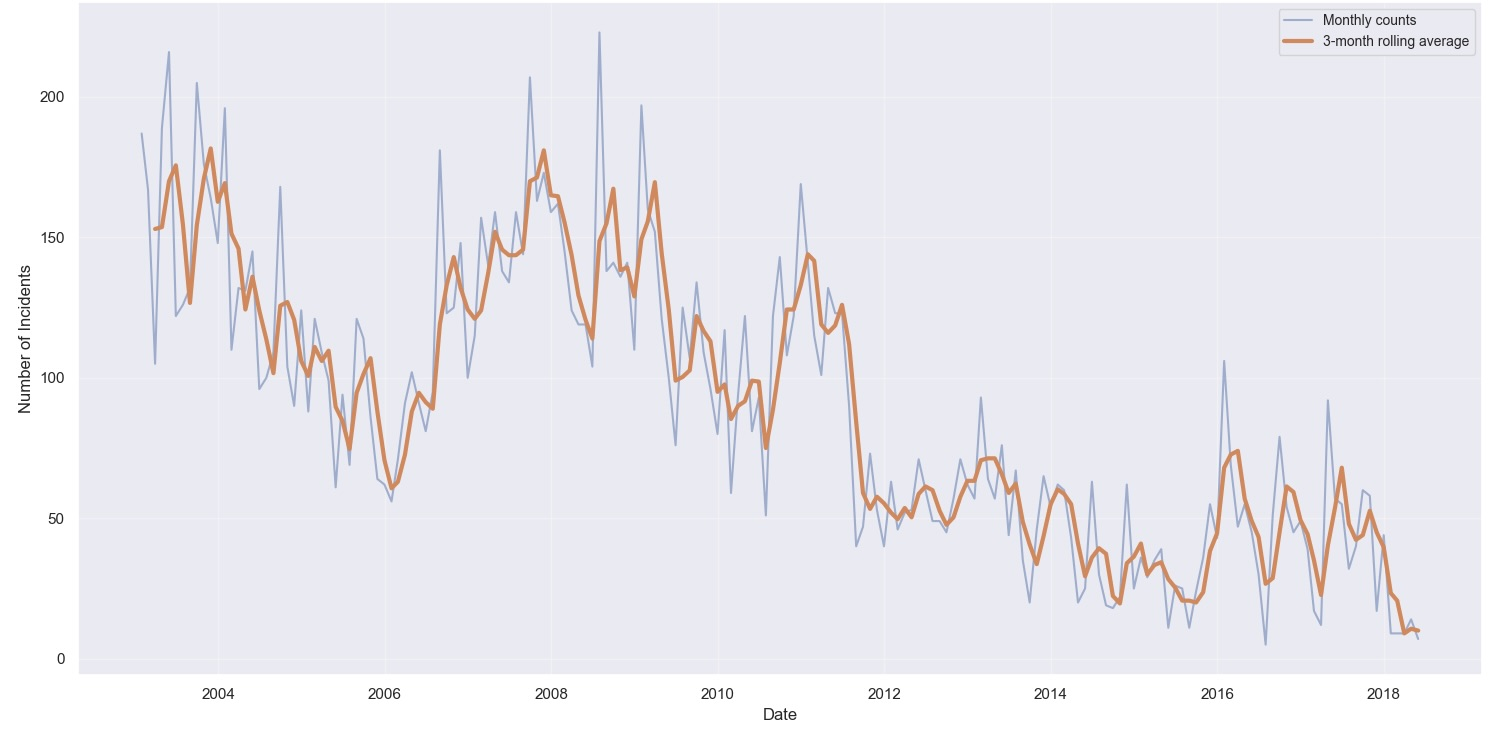


Figure 1: Prostitution incidents over time in San Francisco

Figure 1 shows that prostitution-related crime has declined over time, more specifically after 2012. In the years 2003-2008 prostitution-related incidents were at their highest, and the number of incidents often exceeded 150-200 per month with frequent peaks and drops. In the years 2009-2012, the overall trend suggests a downward shift with incident counts gradually decreasing from 150 per month to below 100. From 2013, prostitution-related crime drops dramatically, reaching its lowest levels by 2015. Unlike the precious period’s decline, this period shows a sharp drop in incidents, with reported cases getting closer to zero in some months.

C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\784452456.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prostitution_df['Date'] = pd.to_datetime(prostitution_df['Date'])
C:\Users\gisle\AppData\Local\Temp\ipykernel_74028\784452456.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = prostitution_df.groupby(pd.Grouper(key='Date', freq='M')).size()


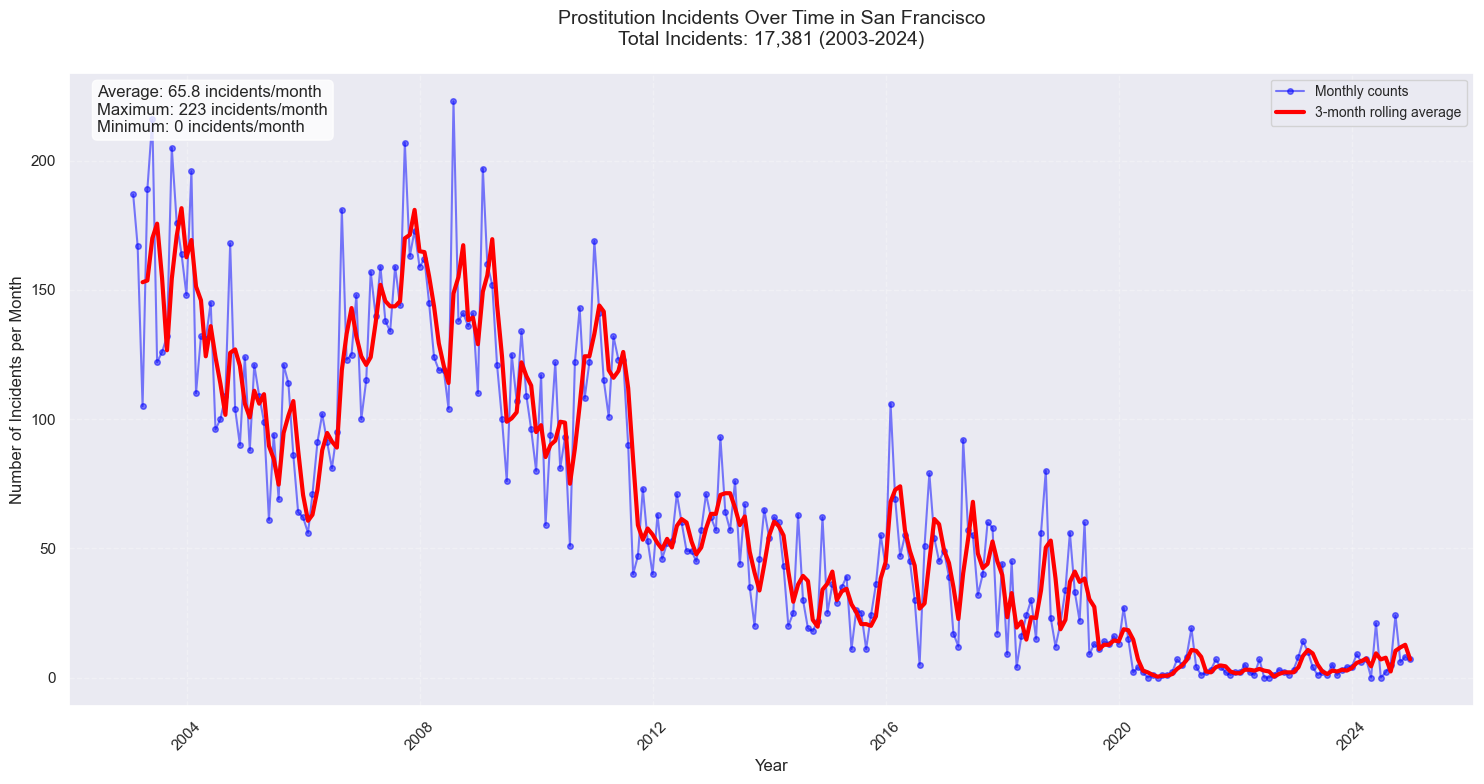

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set more basic style settings that won't cause errors
plt.style.use('default')
sns.set_theme()

# Filter for prostitution incidents
prostitution_df = crime_data[crime_data['Category'] == 'PROSTITUTION']

# 1. Temporal Analysis - Monthly Trends with Rolling Average
prostitution_df['Date'] = pd.to_datetime(prostitution_df['Date'])

# Group by month and year
monthly_counts = prostitution_df.groupby(pd.Grouper(key='Date', freq='M')).size()
rolling_avg = monthly_counts.rolling(window=3).mean()

# Create figure
plt.figure(figsize=(15, 8))

# Plot monthly counts with transparency
plt.plot(monthly_counts.index, monthly_counts.values, 
            alpha=0.5, label='Monthly counts', color='blue', marker='o', markersize=4)

# Plot rolling average with thicker line
plt.plot(rolling_avg.index, rolling_avg.values, 
            linewidth=3, label='3-month rolling average', color='red')

# Add title and labels with more detail
plt.title('Prostitution Incidents Over Time in San Francisco\n' + 
            f'Total Incidents: {len(prostitution_df):,d} ({prostitution_df["Date"].min().year}-{prostitution_df["Date"].max().year})', 
            fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents per Month', fontsize=12)

# Customize grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add legend with better placement
plt.legend(fontsize=10, loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add text box with key statistics
avg_monthly = monthly_counts.mean()
max_monthly = monthly_counts.max()
min_monthly = monthly_counts.min()
stats_text = f'Average: {avg_monthly:.1f} incidents/month\n'
stats_text += f'Maximum: {max_monthly:.0f} incidents/month\n'
stats_text += f'Minimum: {min_monthly:.0f} incidents/month'

plt.text(0.02, 0.98, stats_text,
            transform=plt.gca().transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Although the line chart provides a yearly overview, it lacks specificity. Therefore, a bar chart is presented in Figure 2, which shows the annual number of prostitution-related incidents reported in San Francisco from 2003 to 2018. Each bar represents the total number of recorded incidents in a given year, and the red dashed line marks the average number of incidents per year over this period.
Figure 3 shows that the highest number of recorded incidents occurred in 2003 (1,937 incidents), 2007 (1,848 incidents), and 2008 (1,662 incidents). After 2007, a continuous decline is observed, which can be attributed to several factors. First, there was a shift in law enforcement policies, where authorities began prioritizing human trafficking, redirecting efforts from arresting individual sex workers to targeting larger trafficking operations. Second, sex work transitioned from street-based to online platforms, reducing physical visibility and police encounters. Third, and finally, socioeconomic changes occurred, leading to increased police presence and reduced tolerance for visible street-based prostitution, particularly in neighborhoods such as the Mission and Tenderloin districts (1, 2).

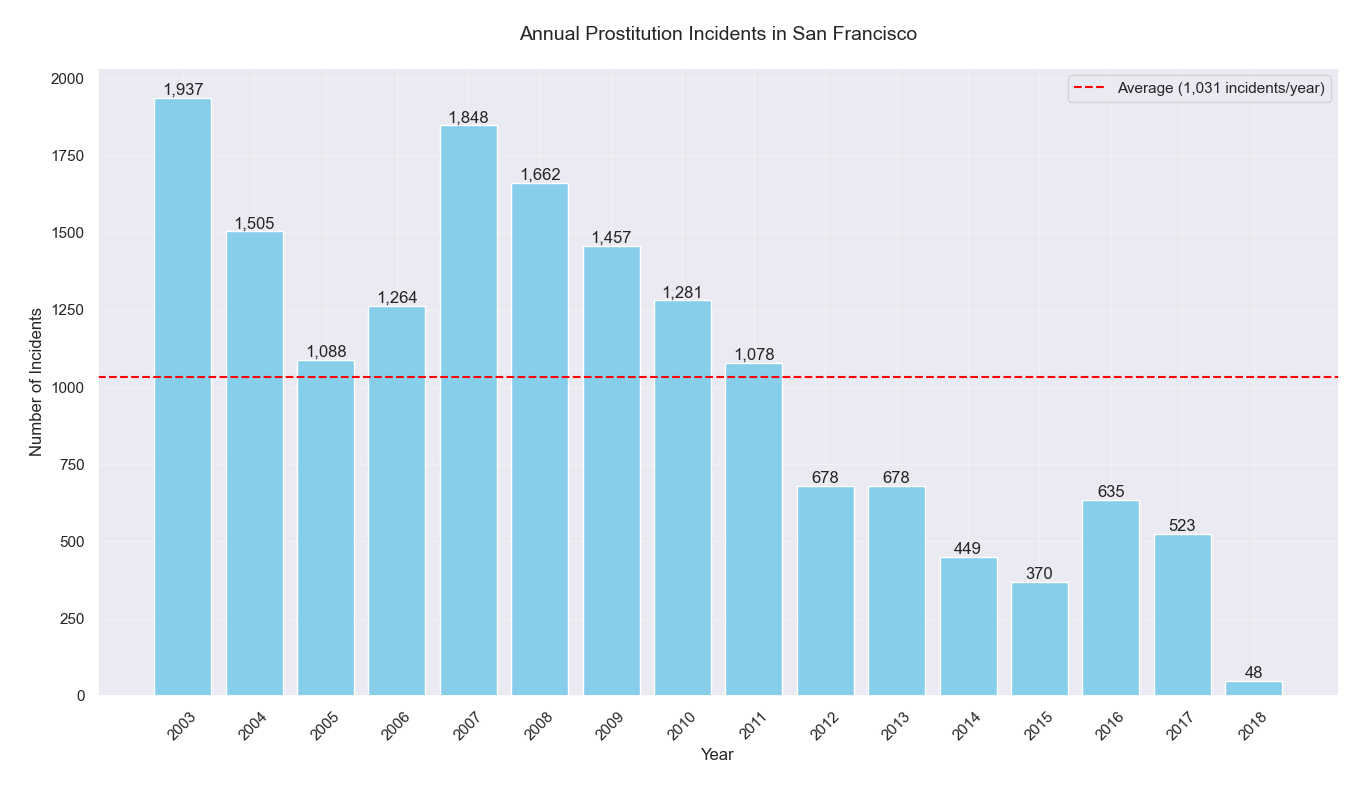

Figure 2: Annual prostitution in San Francisco

In [ ]:
# 2. Yearly Bar Plot
yearly_counts = prostitution_df.groupby(prostitution_df['Date'].dt.year).size().sort_index()
    
plt.figure(figsize=(12, 7))
bars = plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.title('Annual Prostitution Incidents in San Francisco', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,d}',
            ha='center', va='bottom')

# Add average line
avg_yearly = yearly_counts.mean()
plt.axhline(y=avg_yearly, color='red', linestyle='--', label=f'Average ({int(avg_yearly):,d} incidents/year)')

# Ensure x-axis shows all years correctly
plt.xticks(yearly_counts.index, rotation=45)

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Next, a bar chart (Figure 3) is presented to visualize the distribution of prostitution-related incidents in different districts of San Francisco. Each bar represents the total number of prostitution-related cases recorded in each district, with percentage labels indicating the proportion of incidents compared to the total.

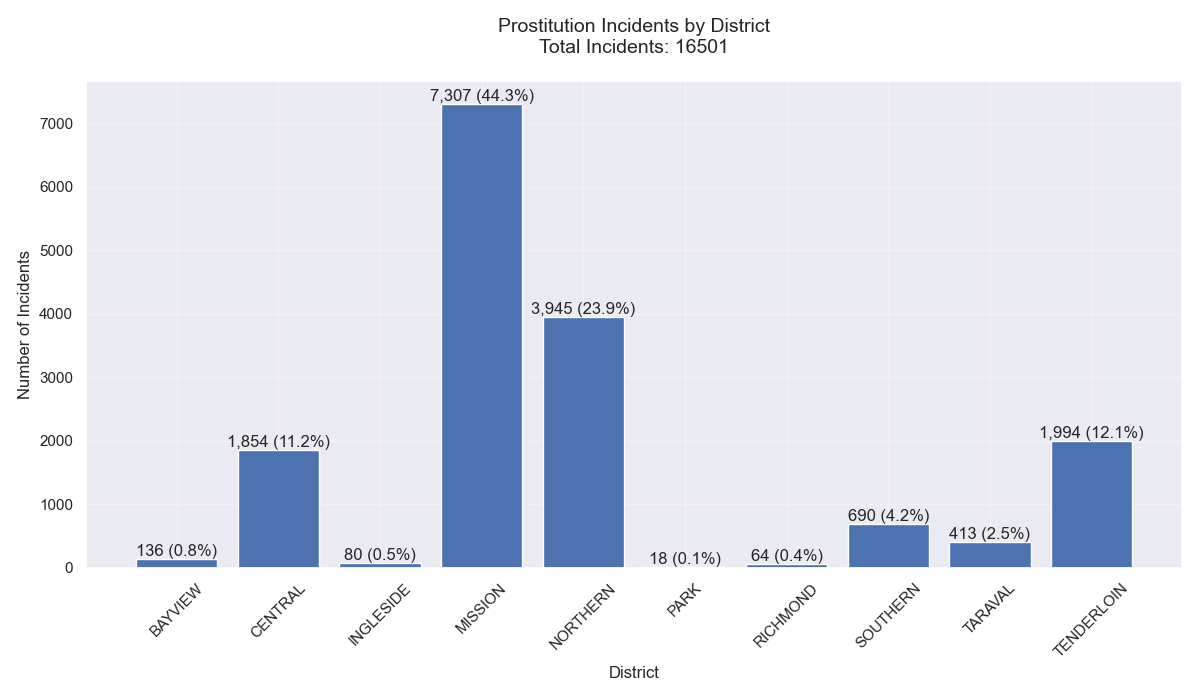

Figure 3: Prostitution incidents by district

Figure 3 shows that prostitution activity is highly concentrated in some districts. These are Mission district with 7307 incidents Northern district with 3945 incidents, and Tenderloin district with 1994 incidents. Together, these three districts represent 80.3 percent of all reports related to prostitution in San Francisco. This might be due to the Mission and Tenderloin districts which have been associated with high crime rates, poverty, and homelessness, which could contribute to increased prostitution activity (3,4). The Nothern district have areas with nightlife and commercial zones, which potentially could have influenced the demand and reporting of prostitution-related offenses (5, 6). In contrast, there are also several districts in San Francisco with very low prostitution activity. These are Park with 18 incidents which is the lowest recorded incidents, Richmond with 64 incidents and Ingleside with 80 incidents. This
could either be due to actual low levels of prostitution or differences in enforcement and reporting practices. The Richmond district is for example known for being a low-crime, family-oriented area which also mean that the prostitution-related complaints are likely low-priority for law enforcement (7).

In [ ]:
# 3. District Analysis with Percentage Labels and Incident Counts
district_counts = prostitution_df.groupby('PdDistrict').size()
total_incidents = district_counts.sum()
district_percentages = (district_counts / total_incidents) * 100

plt.figure(figsize=(12, 7))
bars = plt.bar(district_counts.index, district_counts.values)
plt.title(f'Prostitution Incidents by District\nTotal Incidents: {total_incidents}', 
            fontsize=14, pad=20)
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Add percentage and count labels on top of each bar
for bar, percentage, count in zip(bars, district_percentages, district_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,d} ({percentage:.1f}%)',  # Show both count and percentage
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Sources: 
1) https://www.sfpublicpress.org/after-anti-trafficking-team-shifted-focus-to-prostitution-arrests-police-retool-investigations/

2) https://www.researchgate.net/publication/222741595_Prostitution_20_The_Changing_Face_of_Sex_Work

3) https://sfstandard.com/opinion/2024/03/28/mission-containment-zone/

4) https://en.wikipedia.org/wiki/Tenderloin%2C_San_Francisco

5) https://en.wikipedia.org/wiki/North_Beach%2C_San_Francisco

6) https://sf.funcheap.com/city-guide/sf-city-california-boozy-entertainment-zones/

7) https://www.sftravel.com/article/san-francisco-nightlife-neighborhood